<a href="https://colab.research.google.com/github/Sarvesh326/Image-Classification-System/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

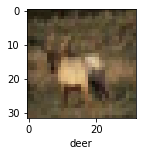

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 38s 6ms/step - loss: 1.4723 - accuracy: 0.4712
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1196 - accuracy: 0.6101
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9939 - accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9114 - accuracy: 0.6842
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8445 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7861 - accuracy: 0.7266
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7357 - accuracy: 0.7429
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6884 - accuracy: 0.7595
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6463 - accuracy: 0.7731
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.60

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9260 - accuracy: 0.6933


[0.9259667992591858, 0.6933000087738037]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.37918240e-04, 1.14389686e-05, 5.92209771e-03, 5.78309238e-01,
        2.40528447e-04, 4.36835736e-02, 7.49782939e-03, 1.82087548e-04,
        3.60742837e-01, 2.87241396e-03],
       [3.32952128e-03, 1.74988736e-03, 6.59336649e-07, 1.03246498e-06,
        3.58411540e-07, 1.50381005e-08, 2.70270277e-08, 1.51384789e-08,
        9.94819105e-01, 9.93287031e-05],
       [3.89529578e-02, 1.15615539e-01, 6.60077087e-04, 1.39110591e-02,
        9.29015409e-03, 1.10104051e-03, 6.65313099e-04, 2.56863842e-03,
        7.29543507e-01, 8.76916796e-02],
       [8.08072269e-01, 1.25261815e-02, 5.16564120e-03, 5.81429282e-04,
        7.89402146e-03, 8.22021102e-05, 1.26842642e-04, 1.49699379e-04,
        1.65029347e-01, 3.72465845e-04],
       [1.03247466e-07, 5.60332683e-06, 9.76028200e-03, 5.61924763e-02,
        6.99089646e-01, 1.55826134e-03, 2.33342648e-01, 3.25878977e-06,
        4.54710207e-05, 2.31609670e-06]], dtype=float32)

In [ ]:
#prediction
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
#actual
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

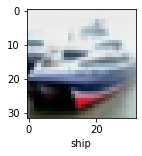

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
for i,v in enumerate(classes):
    print(i,v)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
